In [1]:
import numpy as np
import pandas as pd

In [2]:
power_10_df = pd.read_csv("/kaggle/input/solar-energy-forecasting-using-low-res-sky-images/Low-res sky images kaggle/Power measurements/2019_09_10.csv")
power_11_df = pd.read_csv("/kaggle/input/solar-energy-forecasting-using-low-res-sky-images/Low-res sky images kaggle/Power measurements/2019_09_11.csv")
power_12_df = pd.read_csv("/kaggle/input/solar-energy-forecasting-using-low-res-sky-images/Low-res sky images kaggle/Power measurements/2019_09_12.csv")

In [3]:
power_10_df

,Date and Time,AVG power
0,9-10-19 0:00,0.0
1,9-10-19 0:00,0.0
2,9-10-19 0:01,0.0
3,9-10-19 0:01,0.0
4,9-10-19 0:02,0.0
...,...,...
2875,9-10-19 23:57,0.0
2876,9-10-19 23:58,0.0
2877,9-10-19 23:58,0.0
2878,9-10-19 23:59,0.0


In [4]:
power_10_df['Date and Time'] = pd.to_datetime(power_10_df['Date and Time'])
power_11_df['Date and Time'] = pd.to_datetime(power_11_df['Date and Time'])
power_12_df['Date and Time'] = pd.to_datetime(power_12_df['Date and Time'])

In [5]:
power_10_df.index = power_10_df['Date and Time']

In [6]:
power_10_df

,Date and Time,AVG power
Date and Time,,
2019-09-10 00:00:00,2019-09-10 00:00:00,0.0
2019-09-10 00:00:00,2019-09-10 00:00:00,0.0
2019-09-10 00:01:00,2019-09-10 00:01:00,0.0
2019-09-10 00:01:00,2019-09-10 00:01:00,0.0
2019-09-10 00:02:00,2019-09-10 00:02:00,0.0
...,...,...
2019-09-10 23:57:00,2019-09-10 23:57:00,0.0
2019-09-10 23:58:00,2019-09-10 23:58:00,0.0
2019-09-10 23:58:00,2019-09-10 23:58:00,0.0


In [7]:
power_11_df.index = power_11_df['Date and Time']
power_11_df

,Date and Time,AVG power
Date and Time,,
2019-09-11 00:00:00,2019-09-11 00:00:00,0.0
2019-09-11 00:00:00,2019-09-11 00:00:00,0.0
2019-09-11 00:01:00,2019-09-11 00:01:00,0.0
2019-09-11 00:01:00,2019-09-11 00:01:00,0.0
2019-09-11 00:02:00,2019-09-11 00:02:00,0.0
...,...,...
2019-09-11 23:57:00,2019-09-11 23:57:00,0.0
2019-09-11 23:58:00,2019-09-11 23:58:00,0.0
2019-09-11 23:58:00,2019-09-11 23:58:00,0.0


In [8]:
power_12_df.index = power_12_df['Date and Time']
power_12_df

,Date and Time,AVG power
Date and Time,,
2019-09-12 00:00:00,2019-09-12 00:00:00,0.0
2019-09-12 00:00:00,2019-09-12 00:00:00,0.0
2019-09-12 00:01:00,2019-09-12 00:01:00,0.0
2019-09-12 00:01:00,2019-09-12 00:01:00,0.0
2019-09-12 00:02:00,2019-09-12 00:02:00,0.0
...,...,...
NaT,NaT,NaN
NaT,NaT,NaN
NaT,NaT,NaN


In [9]:
power_df = pd.concat([power_10_df, power_11_df, power_12_df], axis = 0)
power_df

,Date and Time,AVG power
Date and Time,,
2019-09-10 00:00:00,2019-09-10 00:00:00,0.0
2019-09-10 00:00:00,2019-09-10 00:00:00,0.0
2019-09-10 00:01:00,2019-09-10 00:01:00,0.0
2019-09-10 00:01:00,2019-09-10 00:01:00,0.0
2019-09-10 00:02:00,2019-09-10 00:02:00,0.0
...,...,...
NaT,NaT,NaN
NaT,NaT,NaN
NaT,NaT,NaN


In [10]:
power_df.dropna(inplace=True)

<AxesSubplot:xlabel='Date and Time'>

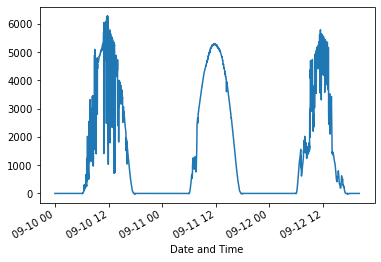

In [11]:
power = power_df['AVG power']
power.plot()

In [12]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [13]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(power, WINDOW_SIZE)
X1.shape, y1.shape

((8170, 5, 1), (8170,))

In [14]:
X_train1, y_train1 = X1[:6000], y1[:6000]
X_val1, y_val1 = X1[6000:7000], y1[6000:7000]
X_test1, y_test1 = X1[7000:], y1[7000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((6000, 5, 1), (6000,), (1000, 5, 1), (1000,), (1170, 5, 1), (1170,))

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [16]:
model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(10, return_sequences=True))
model1.add(LSTM(10))
model1.add(Dense(4, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

2023-02-12 18:24:10.298889: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 10)             480       
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                840       
_________________________________________________________________
dense (Dense)                (None, 4)                 44        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 1,369
Trainable params: 1,369
Non-trainable params: 0
_________________________________________________________________


In [17]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), metrics=[RootMeanSquaredError()])

In [18]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=500, callbacks=[cp1])

Epoch 1/500


2023-02-12 18:24:10.975960: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


188/188 [==============================] - 6s 10ms/step - loss: 6044403.0000 - root_mean_squared_error: 2458.5369 - val_loss: 2756414.5000 - val_root_mean_squared_error: 1660.2454


2023-02-12 18:24:21.008691: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/500
188/188 [==============================] - 1s 5ms/step - loss: 6044108.0000 - root_mean_squared_error: 2458.4768 - val_loss: 2756232.2500 - val_root_mean_squared_error: 1660.1904
Epoch 3/500
188/188 [==============================] - 1s 5ms/step - loss: 6043847.5000 - root_mean_squared_error: 2458.4238 - val_loss: 2756050.0000 - val_root_mean_squared_error: 1660.1355
Epoch 4/500
188/188 [==============================] - 1s 5ms/step - loss: 6043586.0000 - root_mean_squared_error: 2458.3706 - val_loss: 2755868.7500 - val_root_mean_squared_error: 1660.0809
Epoch 5/500
188/188 [==============================] - 1s 7ms/step - loss: 6043325.0000 - root_mean_squared_error: 2458.3176 - val_loss: 2755686.5000 - val_root_mean_squared_error: 1660.0260
Epoch 6/500
188/188 [==============================] - 1s 5ms/step - loss: 6043061.0000 - root_mean_squared_error: 2458.2639 - val_loss: 2755504.2500 - val_root_mean_squared_error: 1659.9712
Epoch 7/500
188/188 [========================

In [19]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [20]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

,Train Predictions,Actuals
0,-0.017803,0.0
1,-0.017803,0.0
2,-0.017803,0.0
3,-0.017803,0.0
4,-0.017803,0.0
...,...,...
5995,-0.017803,0.0
5996,-0.017803,0.0
5997,-0.017803,0.0
5998,-0.017803,0.0


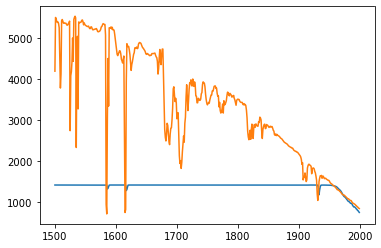

In [21]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][1500:2000])
plt.plot(train_results['Actuals'][1500:2000])

In [22]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

,Val Predictions,Actuals
0,-0.017803,0.0
1,-0.017803,0.0
2,-0.017803,0.0
3,-0.017803,0.0
4,-0.017803,0.0
...,...,...
995,1415.495605,4680.0
996,1415.495728,4620.0
997,1415.495850,4600.0
998,1415.495728,4430.0


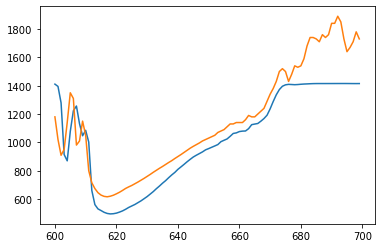

In [23]:
plt.plot(val_results['Val Predictions'][600:700])
plt.plot(val_results['Actuals'][600:700])

In [24]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

,Test Predictions,Actuals
0,1415.495605,4910.0
1,1415.495605,5000.0
2,1415.495728,4970.0
3,1415.495850,4770.0
4,1415.495728,4720.0
...,...,...
1165,-0.017803,0.0
1166,-0.017803,0.0
1167,-0.017803,0.0
1168,-0.017803,0.0


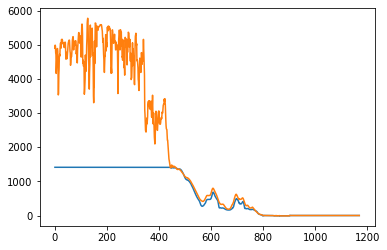

In [25]:
plt.plot(test_results['Test Predictions'])
plt.plot(test_results['Actuals'])

In [26]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:])
  plt.plot(df['Actuals'][start:])
  return df, mse(y, predictions)

(      Predictions  Actuals
 0     1415.495605   4910.0
 1     1415.495605   5000.0
 2     1415.495728   4970.0
 3     1415.495850   4770.0
 4     1415.495728   4720.0
 ...           ...      ...
 1165    -0.017803      0.0
 1166    -0.017803      0.0
 1167    -0.017803      0.0
 1168    -0.017803      0.0
 1169    -0.017803      0.0
 
 [1170 rows x 2 columns],
 3810398.351183086)

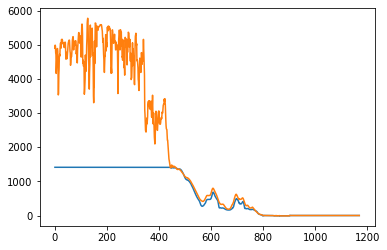

In [27]:
plot_predictions1(model1, X_test1, y_test1)